In [292]:
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
#Reading CSV files in the DIR
file_names = []
file_names = glob.glob('*.csv')

In [253]:
#Checking file names to print
print(file_names)

['dataframe_apicalls_100_finalBID_100_.csv', 'dataframe_apicalls_100_finalBID_199_.csv', 'dataframe_apicalls_100_finalBID_298_.csv', 'dataframe_apicalls_100_finalBID_397_.csv']


In [254]:
#Var to check if it is the first load
load_counter = 0

#Loading files into single dataframe
for file in file_names :
    df = pd.read_csv(file)
    if load_counter == 0 :
        final_df = df.copy()
    else :
        final_df = final_df.append(df, ignore_index=True)
    load_counter += 1

In [255]:
#Check info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 50 columns):
auth_rating                       384 non-null int64
beer_abv                          384 non-null float64
beer_description                  244 non-null object
beer_ibu                          384 non-null int64
beer_label                        384 non-null object
beer_label_hd                     148 non-null object
beer_name                         384 non-null object
beer_slug                         384 non-null object
beer_style                        384 non-null object
bid                               384 non-null int64
brewery.brewery_id                384 non-null int64
brewery.brewery_label             384 non-null object
brewery.brewery_name              384 non-null object
brewery.brewery_slug              384 non-null object
brewery.brewery_type              384 non-null object
brewery.contact.facebook          330 non-null object
brewery.contact.twitter           

In [256]:
#Unsure what these columns mean, although it appears that they are attempting to reclass some of the beer IDs
final_df[['bid', 'merge_details.requested_bid' ,'merge_details.merge_date']].head()

,bid,merge_details.requested_bid,merge_details.merge_date
0,1,NaN,NaN
1,2,NaN,NaN
2,505601,3.0,"Mon, 18 Nov 2013 18:44:07 +0000"
3,16551,4.0,"Sat, 11 Jan 2014 21:37:13 +0000"
4,5,NaN,NaN


In [257]:
#Check col names
final_df.columns

Index(['auth_rating', 'beer_abv', 'beer_description', 'beer_ibu', 'beer_label',
       'beer_label_hd', 'beer_name', 'beer_slug', 'beer_style', 'bid',
       'brewery.brewery_id', 'brewery.brewery_label', 'brewery.brewery_name',
       'brewery.brewery_slug', 'brewery.brewery_type',
       'brewery.contact.facebook', 'brewery.contact.twitter',
       'brewery.contact.url', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'brewery.location.lat', 'brewery.location.lng', 'created_at',
       'is_homebrew', 'is_in_production', 'merge_details.master_bid',
       'merge_details.merge_date', 'merge_details.requested_bid',
       'rating_count', 'rating_score', 'rating_score_below',
       'stats.monthly_count', 'stats.total_count', 'stats.total_user_count',
       'stats.user_count', 'variant_parent.beer.beer_abv',
       'variant_parent.beer.beer_name', 'variant_parent.beer.beer_slug',
       'variant_parent.beer.bid', 'variant_parent.b

In [258]:
#List of ALL columns to drop for various reasons. Descriptions, hyperlinks, social media, etc.
drop_cols = ['auth_rating', 'beer_description', 'beer_label', 'beer_label_hd', 'beer_slug', 'brewery.brewery_slug',
            'brewery.contact.facebook', 'brewery.contact.twitter', 'brewery.contact.url', 'rating_score_below', 
            'variant_parent.beer.beer_abv', 'variant_parent.beer.beer_name', 'variant_parent.beer.beer_slug',
            'variant_parent.beer.bid', 'variant_parent.beer.type_id', 'brewery.brewery_label', 
            'vintage_parent.beer.beer_abv', 'vintage_parent.beer.beer_name', 'stats.user_count', 
            'vintage_parent.beer.beer_slug', 'vintage_parent.beer.bid', 
            'vintage_parent.beer.type_id', 'merge_details.master_bid',
            'merge_details.merge_date', 'merge_details.requested_bid', 'vintages.count', 'vintages.items']

In [288]:
len(drop_cols)

27

In [259]:
final_df.drop(drop_cols, axis=1, inplace=True)

In [260]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 23 columns):
beer_abv                          384 non-null float64
beer_ibu                          384 non-null int64
beer_name                         384 non-null object
beer_style                        384 non-null object
bid                               384 non-null int64
brewery.brewery_id                384 non-null int64
brewery.brewery_name              384 non-null object
brewery.brewery_type              384 non-null object
brewery.country_name              384 non-null object
brewery.location.brewery_city     377 non-null object
brewery.location.brewery_state    353 non-null object
brewery.location.lat              384 non-null float64
brewery.location.lng              384 non-null float64
created_at                        384 non-null object
is_homebrew                       384 non-null int64
is_in_production                  384 non-null int64
rating_count                     

In [261]:
#Check for any duplicate beers
final_df.drop_duplicates(inplace=True)

In [262]:
final_df[final_df['bid'] == 20951]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
19,9.6,90,Bigfoot,Barleywine - American,20951,1142,Sierra Nevada Brewing Co.,Micro Brewery,United States,Chico,...,"Tue, 04 Jan 2011 05:21:14 +0000",0,1,29557,3.7424,1126,39601,34060,3.74146,False


In [263]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 383
Data columns (total 23 columns):
beer_abv                          377 non-null float64
beer_ibu                          377 non-null int64
beer_name                         377 non-null object
beer_style                        377 non-null object
bid                               377 non-null int64
brewery.brewery_id                377 non-null int64
brewery.brewery_name              377 non-null object
brewery.brewery_type              377 non-null object
brewery.country_name              377 non-null object
brewery.location.brewery_city     370 non-null object
brewery.location.brewery_state    346 non-null object
brewery.location.lat              377 non-null float64
brewery.location.lng              377 non-null float64
created_at                        377 non-null object
is_homebrew                       377 non-null int64
is_in_production                  377 non-null int64
rating_count                     

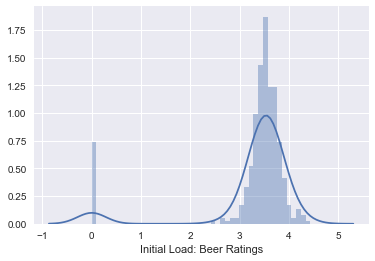

In [264]:
sns.distplot(final_df['rating_score'], axlabel='Initial Load: Beer Ratings')

In [265]:
final_df[['bid', 'rating_score', 'stats.total_count']].head(10)

,bid,rating_score,stats.total_count
0,1,3.23438,15167
1,2,3.50676,94033
2,505601,3.69031,5862
3,16551,3.59889,36984
4,5,3.28888,710
5,6,3.38228,2542
6,7,3.58333,69
7,8,3.83907,101356
8,9,0.00000,8
9,10,3.38679,29839


In [266]:
final_df['rating_score'].describe()

count    377.000000
mean       3.282889
std        0.948444
min        0.000000
25%        3.334220
50%        3.512050
75%        3.684750
max        4.435500
Name: rating_score, dtype: float64

In [267]:
filtered_df = final_df[final_df['rating_score'] > 0.0]
filtered_df['rating_score'].describe()

count    350.000000
mean       3.536140
std        0.266531
min        2.500000
25%        3.386960
50%        3.525330
75%        3.691655
max        4.435500
Name: rating_score, dtype: float64

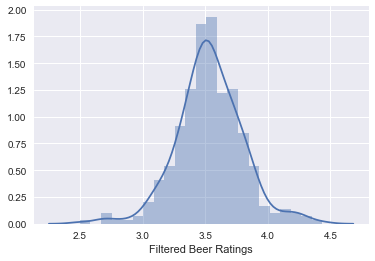

In [268]:
sns.distplot(filtered_df['rating_score'], axlabel='Filtered Beer Ratings')

In [269]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 383
Data columns (total 23 columns):
beer_abv                          350 non-null float64
beer_ibu                          350 non-null int64
beer_name                         350 non-null object
beer_style                        350 non-null object
bid                               350 non-null int64
brewery.brewery_id                350 non-null int64
brewery.brewery_name              350 non-null object
brewery.brewery_type              350 non-null object
brewery.country_name              350 non-null object
brewery.location.brewery_city     344 non-null object
brewery.location.brewery_state    322 non-null object
brewery.location.lat              350 non-null float64
brewery.location.lng              350 non-null float64
created_at                        350 non-null object
is_homebrew                       350 non-null int64
is_in_production                  350 non-null int64
rating_count                     

In [270]:
filtered_df['brewery.location.brewery_state'].fillna(value='', inplace=True)

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [271]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 383
Data columns (total 23 columns):
beer_abv                          350 non-null float64
beer_ibu                          350 non-null int64
beer_name                         350 non-null object
beer_style                        350 non-null object
bid                               350 non-null int64
brewery.brewery_id                350 non-null int64
brewery.brewery_name              350 non-null object
brewery.brewery_type              350 non-null object
brewery.country_name              350 non-null object
brewery.location.brewery_city     344 non-null object
brewery.location.brewery_state    350 non-null object
brewery.location.lat              350 non-null float64
brewery.location.lng              350 non-null float64
created_at                        350 non-null object
is_homebrew                       350 non-null int64
is_in_production                  350 non-null int64
rating_count                     

In [272]:
filtered_df['brewery.location.brewery_city'].fillna(value='', inplace=True)

/Users/joshuaemayer/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [273]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 383
Data columns (total 23 columns):
beer_abv                          350 non-null float64
beer_ibu                          350 non-null int64
beer_name                         350 non-null object
beer_style                        350 non-null object
bid                               350 non-null int64
brewery.brewery_id                350 non-null int64
brewery.brewery_name              350 non-null object
brewery.brewery_type              350 non-null object
brewery.country_name              350 non-null object
brewery.location.brewery_city     350 non-null object
brewery.location.brewery_state    350 non-null object
brewery.location.lat              350 non-null float64
brewery.location.lng              350 non-null float64
created_at                        350 non-null object
is_homebrew                       350 non-null int64
is_in_production                  350 non-null int64
rating_count                     

In [277]:
filtered_df[filtered_df['is_in_production'] == 0]['bid'].count()

35

In [278]:
filtered_df.describe()

,beer_abv,beer_ibu,bid,brewery.brewery_id,brewery.location.lat,brewery.location.lng,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,6.548829,14.522857,20526.174286,3159.862857,42.483850,-62.645488,0.0,0.900000,11582.437143,3.536140,238.762857,16618.882857,13017.085714,3.586119
std,2.242651,21.490273,93233.697386,14150.858218,13.630378,59.982219,0.0,0.300429,21110.943783,0.266531,553.361148,32844.108627,23651.838360,0.183810
min,0.000000,0.000000,1.000000,44.000000,-34.872700,-124.153000,0.0,0.000000,10.000000,2.500000,0.000000,13.000000,13.000000,3.124160
25%,5.000000,0.000000,128.250000,435.000000,38.837525,-120.599750,0.0,1.000000,410.500000,3.386960,2.000000,557.500000,520.000000,3.476863
50%,6.000000,0.000000,264.500000,869.000000,43.854400,-95.930900,0.0,1.000000,3266.500000,3.525330,36.000000,4399.000000,3738.500000,3.581245
75%,8.000000,25.000000,394.500000,2470.000000,50.838500,3.298900,0.0,1.000000,13145.250000,3.691655,230.750000,17568.000000,14684.750000,3.670818
max,17.100000,95.000000,932498.000000,237672.000000,58.406000,140.468000,0.0,1.000000,169923.000000,4.435500,4973.000000,280203.000000,195463.000000,4.433650


In [279]:
filtered_df[filtered_df['beer_abv'] > 0.1].count()

beer_abv                          342
beer_ibu                          342
beer_name                         342
beer_style                        342
bid                               342
brewery.brewery_id                342
brewery.brewery_name              342
brewery.brewery_type              342
brewery.country_name              342
brewery.location.brewery_city     342
brewery.location.brewery_state    342
brewery.location.lat              342
brewery.location.lng              342
created_at                        342
is_homebrew                       342
is_in_production                  342
rating_count                      342
rating_score                      342
stats.monthly_count               342
stats.total_count                 342
stats.total_user_count            342
weighted_rating_score             342
wish_list                         342
dtype: int64

In [281]:
filtered_df = filtered_df[filtered_df['beer_abv'] > 0.1]

In [280]:
filtered_df[filtered_df['beer_ibu'] > 0.1].count()

beer_abv                          143
beer_ibu                          143
beer_name                         143
beer_style                        143
bid                               143
brewery.brewery_id                143
brewery.brewery_name              143
brewery.brewery_type              143
brewery.country_name              143
brewery.location.brewery_city     143
brewery.location.brewery_state    143
brewery.location.lat              143
brewery.location.lng              143
created_at                        143
is_homebrew                       143
is_in_production                  143
rating_count                      143
rating_score                      143
stats.monthly_count               143
stats.total_count                 143
stats.total_user_count            143
weighted_rating_score             143
wish_list                         143
dtype: int64

In [238]:
#filtered_df = filtered_df[filtered_df['beer_ibu'] > 0.1]

In [282]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 383
Data columns (total 23 columns):
beer_abv                          342 non-null float64
beer_ibu                          342 non-null int64
beer_name                         342 non-null object
beer_style                        342 non-null object
bid                               342 non-null int64
brewery.brewery_id                342 non-null int64
brewery.brewery_name              342 non-null object
brewery.brewery_type              342 non-null object
brewery.country_name              342 non-null object
brewery.location.brewery_city     342 non-null object
brewery.location.brewery_state    342 non-null object
brewery.location.lat              342 non-null float64
brewery.location.lng              342 non-null float64
created_at                        342 non-null object
is_homebrew                       342 non-null int64
is_in_production                  342 non-null int64
rating_count                     

In [283]:
filtered_df.describe()

,beer_abv,beer_ibu,bid,brewery.brewery_id,brewery.location.lat,brewery.location.lng,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,6.702018,14.862573,20863.166667,3184.500000,42.524782,-61.643623,0.0,0.900585,11851.839181,3.539108,244.342105,17004.511696,13318.897661,3.585927
std,2.029234,21.624124,94263.769766,14310.355115,13.779331,60.294458,0.0,0.299657,21282.454054,0.264922,558.593308,33128.800106,23843.995962,0.185577
min,3.500000,0.000000,1.000000,44.000000,-34.872700,-124.153000,0.0,0.000000,10.000000,2.500000,0.000000,13.000000,13.000000,3.124160
25%,5.100000,0.000000,130.000000,432.250000,38.837525,-120.599750,0.0,1.000000,476.000000,3.392733,3.000000,617.250000,545.000000,3.473492
50%,6.100000,0.000000,265.500000,862.500000,44.046800,-93.973150,0.0,1.000000,3576.500000,3.525330,39.500000,4659.000000,4076.000000,3.577225
75%,8.000000,25.000000,395.750000,2470.000000,50.841000,3.309395,0.0,1.000000,13261.000000,3.691172,241.250000,17936.750000,14831.750000,3.671250
max,17.100000,95.000000,932498.000000,237672.000000,58.406000,140.468000,0.0,1.000000,169923.000000,4.435500,4973.000000,280203.000000,195463.000000,4.433650


In [286]:
filtered_df.drop('beer_ibu', axis=1, inplace=True)

In [311]:
filtered_df.describe()

,beer_abv,bid,brewery.brewery_id,brewery.location.lat,brewery.location.lng,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,6.702018,20863.166667,3184.500000,42.524782,-61.643623,0.0,0.900585,11851.839181,3.539108,244.342105,17004.511696,13318.897661,3.585927
std,2.029234,94263.769766,14310.355115,13.779331,60.294458,0.0,0.299657,21282.454054,0.264922,558.593308,33128.800106,23843.995962,0.185577
min,3.500000,1.000000,44.000000,-34.872700,-124.153000,0.0,0.000000,10.000000,2.500000,0.000000,13.000000,13.000000,3.124160
25%,5.100000,130.000000,432.250000,38.837525,-120.599750,0.0,1.000000,476.000000,3.392733,3.000000,617.250000,545.000000,3.473492
50%,6.100000,265.500000,862.500000,44.046800,-93.973150,0.0,1.000000,3576.500000,3.525330,39.500000,4659.000000,4076.000000,3.577225
75%,8.000000,395.750000,2470.000000,50.841000,3.309395,0.0,1.000000,13261.000000,3.691172,241.250000,17936.750000,14831.750000,3.671250
max,17.100000,932498.000000,237672.000000,58.406000,140.468000,0.0,1.000000,169923.000000,4.435500,4973.000000,280203.000000,195463.000000,4.433650


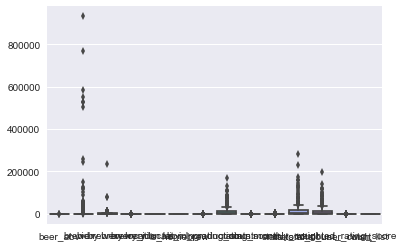

In [310]:
sns_plot = sns.boxplot(data=filtered_df)